In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import HTML, display
from scipy.stats import kstest

# Definisi Pertanyaan

Air-Quailty atau Kualitas udara adalah kadar kandungan udara yang didasarkan pada konsentrasi polutan pada suatu tempat. Pada analisis kali ini akan berusaha mengetahui kondisi kualitas udara yang berada pada stasiun di negara China. Menurut [DLHK Aceh](https://dlhk.acehprov.go.id/2021/03/melalui-ispu-masyarakat-dapat-mengetahui-kualitas-udara/#:~:text=Parameter%20yang%20digunakan%20dalam%20perhitungan,%2C%20dan%20Hidrokarbon%20(HC)) terdapat beberapa faktor penting yang akan digunakan untuk mengetahui kualitas udara yaitu
1. PM2.5
2. PM10
3. SO2
4. NO2
5. CO
6. O3

Berdasarkan hal tersebut, maka penulis ingin mengetahui
1. Korelasi faktor penting yang disebutkan di atas terhadap TEMP (Temperature), DEWP (Dew Point), PRES (Pressure), Rain
2. Komposisi stasiun yang memiliki tingkat rata-rata tertinggi dan terendah dari faktor penting kualitas udara
3. Perkembangan nilai tahun secara rata-rata pada faktor di atas setiap stasiun, sehingga mengetahui tahun tertinggi nya



# Persiapan Data

Dataset Air-Qualiaty pada statusiun yang ada di China, pada dataset tersebut terdiri 12 jenis dataset. Namun, pada analisis kali ini akan berusaha berfokus kepada 3 jenis dataset saja yaitu 
1. PRSA_Data_Aotizhongxin_20130301-20170228
2. PRSA_Data_Changping_20130301-20170228
3. PRSA_Data_Dingling_20130301-20170228

Dataset ini nantinya akan dilakukan penggabungan menjadi dalam sebuah frame menggunakan fungsi **concat**

In [157]:
path = "HTI-master\HTI-master\PRSA_Data_20130301-20170228"
df_Aotizhongxin = pd.read_csv(path+'\PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Changping = pd.read_csv(path+'\PRSA_Data_Changping_20130301-20170228.csv')
df_Dingling = pd.read_csv(path+'\PRSA_Data_Dingling_20130301-20170228.csv')

df = pd.concat([df_Aotizhongxin,df_Changping,df_Dingling], ignore_index=True)
df.drop(columns = ['No'], axis = 1, inplace=True)
df['year'] = df['year'].astype("str")


display(HTML("<h3> Dataset Aotizhongxin </h3>"))
display(df_Aotizhongxin)

display(HTML("<h3> Dataset Changping </h3>"))
display(df_Changping)

display(HTML("<h3> Dataset Dingling </h3>"))
display(df_Dingling)

display(HTML("<h3> Penggabungan dataset </h3>"))
display(df)




,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
105188,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
105189,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
105190,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


### Menangani Nilai NaN dan Missing Value

In [158]:
nilai_missing_value = pd.DataFrame(df.isnull().sum(), columns = ['Total'])

display(HTML("<h3> Nilai Missing Value</h3>"))
display(nilai_missing_value)


,Total
year,0
month,0
day,0
hour,0
PM2.5,2478
PM10,1956
SO2,2293
NO2,2924
CO,5309
O3,3537


Dikarenakan terdapat beberapa feature yang memiliki missing value, maka diperlukan untuk mengatasi hal tersebut. Penulis tidak akan melakukan dropping data, hal ini dikarenakan sifatnya yang series (harian dan tahunan), sehingga penulis akan menggunakan teknik interpolation yang lebih cocok berdasarkan jenis data yang digunakan yaitu series. Teknik ini berlaku untuk keseluruhan feature yang memiliki missing value kecuali wd dan wspm dikarenakan analisis kali ini tidak berfokus pada feature tersebut.

In [159]:
kolom_yang_digunakan = df.select_dtypes(include='number').columns[4:14]

for i in range(len(kolom_yang_digunakan)):
    df[kolom_yang_digunakan[i]].interpolate(method ='linear', limit_direction = 'forward', inplace = True)

In [160]:
nilai_missing_value = pd.DataFrame(df.isnull().sum(), columns = ['Total'])

display(HTML("<h3> Nilai Missing Value</h3>"))
display(nilai_missing_value)

,Total
year,0
month,0
day,0
hour,0
PM2.5,2478
PM10,0
SO2,0
NO2,0
CO,0
O3,0


Hasil missing value setiap feature telah bernilai 0, artinya missing value telah diatasi

### Mengecek Duplikasi

In [161]:
print("Total Duplikasi : ",df.duplicated(keep='first').sum().sum())

Total Duplikasi :  0


Tidak terdapat duplikasi dari keseluruhan data

# Analisis Data

### Korelasi Features

Sebelum melakukan korelasi, penulis ingin mengecek normalitas setiap feature. Hal ini diperlukan untuk menentukan jenis korelasi yang tepat.
1. H0 -> Feature bersifat distribusi normal
2. H1 -> Feature tidak bersifat distribusi normal

Nilai penentu alpha(a).

Jika alpha <0.05, H0 ditolak

Jika H1 diterima, maka teknik korelasi yang digunakan adalah spearman

In [162]:
result = []

for i in range(len(kolom_yang_digunakan)):
    result.append(kstest(df[kolom_yang_digunakan[i]],"norm")[1])

In [163]:
data = { 'kolom' : kolom_yang_digunakan,
          'Alpha' : result
       }

hasil = pd.DataFrame(data = data)
hasil['keputusan'] = ['Hipotesis Nol Ditolak' if x < 0.05 else 'Hipotesis Nol Diterima' for x in hasil['Alpha']]
hasil

,kolom,Alpha,keputusan
0,PM10,0.0,Hipotesis Nol Ditolak
1,SO2,0.0,Hipotesis Nol Ditolak
2,NO2,0.0,Hipotesis Nol Ditolak
3,CO,0.0,Hipotesis Nol Ditolak
4,O3,0.0,Hipotesis Nol Ditolak
5,TEMP,0.0,Hipotesis Nol Ditolak
6,PRES,0.0,Hipotesis Nol Ditolak
7,DEWP,0.0,Hipotesis Nol Ditolak
8,RAIN,0.0,Hipotesis Nol Ditolak
9,WSPM,0.0,Hipotesis Nol Ditolak


In [164]:
def spearman_corr(df):
    plt.figure(figsize=(15,10))
    sns.heatmap(df.corr(method='spearman'), annot = True, annot_kws={'fontsize':17}, linewidths=0.1)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

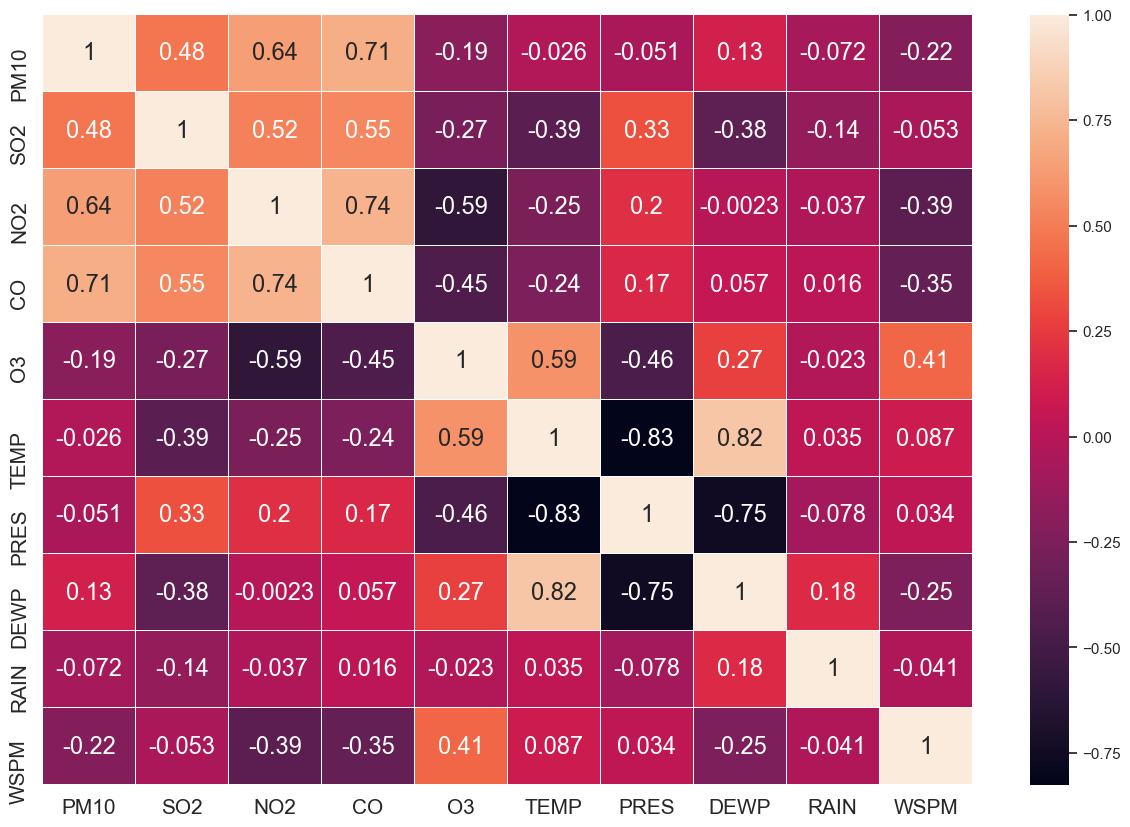

In [165]:
spearman_corr(df[kolom_yang_digunakan])

Berdasarkan hasil korelasi, maka dapat menjawab pertanyaan 1 pertama.

Hasil menunjukkan, nilai korelasi faktor penting udara dengan TEMP, PRES, DEWP dan RAIN berada pada jenis Moderate Correlation (Tingkat Menengah) menuju Low Correlation (Tingkat Lemah). Hal ini dikarenakan nilai tersebut berada pada -0.5 hingga 0.6. Sehingga bisa disimpulkan pengaruh keempat feature terhadap faktor penting kualitas udara tidak terlalu signifikan

### Statistik pada dataset

Nilai statistik pada feature yang digunakan adalah keselurhan feature numerik kecuali year, month, day dan hour

In [166]:
mean_Aotizhongxin = df[df['station'] == 'Aotizhongxin'].iloc[:,4:10].mean()
mean_Changping = df[df['station'] == 'Changping'].iloc[:,4:10].mean()
mean_Dingling = df[df['station'] == 'Dingling'].iloc[:,4:10].mean()

In [167]:
data = {'features': mean_Aotizhongxin.index,
        'Mean_Aotizhongxin': mean_Aotizhongxin.values,
        'Mean_Changping': mean_Changping.values,
        'Mean_Dingling': mean_Dingling.values}


frame_mean = pd.DataFrame(data = data)
frame_mean['Max Kota'] = ["Aotizhongxin" if np.max([frame_mean.Mean_Aotizhongxin[i],frame_mean.Mean_Changping[i],frame_mean.Mean_Dingling[i]]) == frame_mean.Mean_Aotizhongxin[i] else("Changping" if np.max([frame_mean.Mean_Aotizhongxin[i],frame_mean.Mean_Changping[i],frame_mean.Mean_Dingling[i]]) == frame_mean.Mean_Changping[i] else "Dingling") for i in range(len(frame_mean))]
frame_mean['Min Kota'] = ["Aotizhongxin" if np.min([frame_mean.Mean_Aotizhongxin[i],frame_mean.Mean_Changping[i],frame_mean.Mean_Dingling[i]]) == frame_mean.Mean_Aotizhongxin[i] else("Changping" if np.min([frame_mean.Mean_Aotizhongxin[i],frame_mean.Mean_Changping[i],frame_mean.Mean_Dingling[i]]) == frame_mean.Mean_Changping[i] else "Dingling") for i in range(len(frame_mean))]

frame_mean

,features,Mean_Aotizhongxin,Mean_Changping,Mean_Dingling,Max Kota,Min Kota
0,PM2.5,82.773611,71.099743,65.989497,Aotizhongxin,Dingling
1,PM10,110.210033,94.788575,84.113713,Aotizhongxin,Dingling
2,SO2,17.459251,14.943066,11.797849,Aotizhongxin,Dingling
3,NO2,59.074106,44.206153,27.304331,Aotizhongxin,Dingling
4,CO,1264.692405,1156.990246,925.111838,Aotizhongxin,Dingling
5,O3,55.328626,57.976253,70.530792,Dingling,Aotizhongxin


Berdasarkan hasil tersebut, dapat menjawab pertanyaan point kedua

Jawaban: 
1. Aotizhongxin merupakan statsiun yang memiliki tingkat rata-rata faktor kualitas udara tertinggi dari statsiun yang lain kecuali faktor O3, hal tersebut dikarenakan faktor O3 tertinggi dipengang oleh stasiun Dingling dan sekaligus menyatakan O3 merupakan nilai terendah pada stasiun Aotizhongxin
2. Selain O3, Stasiun Dingling merupakan stasiun yang memiliki tingkat rata-rata faktor kualitas terendah.

### Visual Data

In [168]:
filter_Aotizhongxin = df[df['station'] == 'Aotizhongxin'].iloc[:,0:10]
filter_Changping = df[df['station'] == 'Changping'].iloc[:,0:10]
filter_Dingling = df[df['station'] == 'Dingling'].iloc[:,0:10]

In [185]:
year_Aotizhongxin_params = pd.DataFrame(filter_Aotizhongxin.groupby(filter_Aotizhongxin['year'])[mean_Aotizhongxin.index].mean()).reset_index()
year_Changping_params = pd.DataFrame(filter_Changping.groupby(filter_Changping['year'])[mean_Aotizhongxin.index].mean()).reset_index()
year_Dingling_params = pd.DataFrame(filter_Dingling.groupby(filter_Dingling['year'])[mean_Aotizhongxin.index].mean()).reset_index()

In [186]:
display(HTML("<h3> Year Aotizhongxin </h3>"))
display(year_Aotizhongxin_params)

display(HTML("<h3> Year Changping </h3>"))
display(year_Changping_params)

display(HTML("<h3> Year Dingling </h3>"))
display(year_Dingling_params)

,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,82.392472,112.940836,23.599799,63.355500,1163.919458,47.206555
1,2014,90.796063,122.282112,21.515582,63.164053,1186.718037,48.594041
2,2015,82.118422,112.176747,14.354195,60.939047,1436.889269,63.604132
3,2016,74.104334,94.445811,10.833732,48.402493,1190.215164,61.854793
4,2017,94.762143,106.988347,20.827331,66.229520,1666.454802,47.436088


,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,72.644508,91.176675,19.134785,40.960527,1022.978758,61.132385
1,2014,79.410815,107.611416,21.250228,45.968002,1229.971461,63.019235
2,2015,69.615911,93.275696,11.698721,42.725942,1162.431507,58.307374
3,2016,61.655940,86.632115,8.144126,45.541268,1129.764344,54.002618
4,2017,80.101284,94.150777,16.431497,51.014831,1535.769774,33.010593


,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,64.754924,78.884940,13.955578,28.772379,940.035607,64.549386
1,2014,74.155592,91.554865,14.872983,27.365046,890.734399,72.762681
2,2015,64.610369,85.374616,11.322508,26.821221,963.934551,71.166486
3,2016,59.827554,80.707707,7.166041,25.375114,870.810565,75.364925
4,2017,68.365316,78.526483,13.256356,34.271186,1157.062147,53.824859


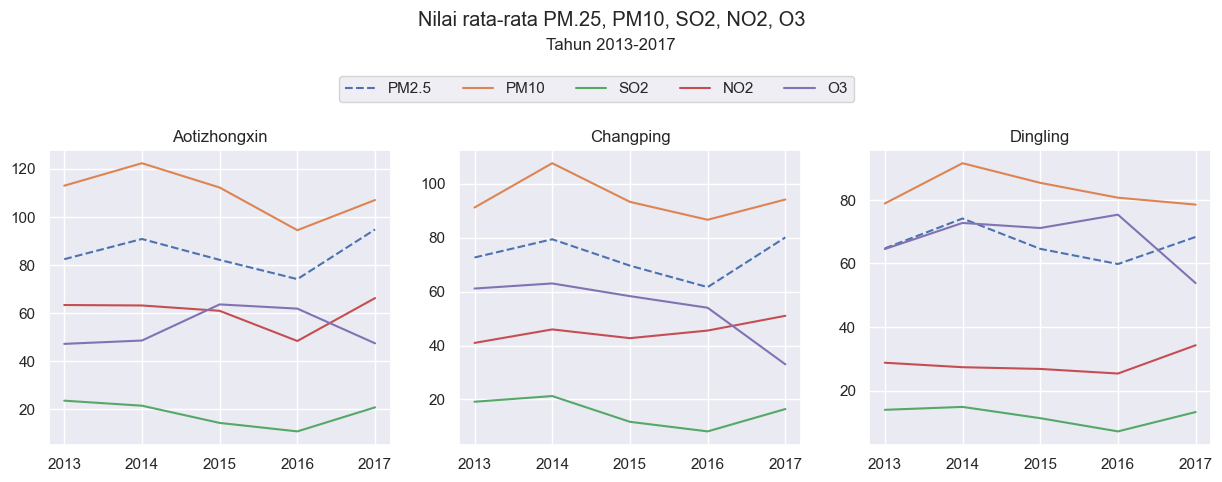

In [189]:
fig,ax = plt.subplots(1,3, figsize = (15,5), sharex=True)


fig.subplots_adjust(hspace=0.7, top=0.7)
fig.suptitle('Nilai rata-rata PM.25, PM10, SO2, NO2, O3')
fig.text(0.5,0.9,'Tahun 2013-2017', horizontalalignment="center")
sns.set(style = 'darkgrid')

ax[0].title.set_text('Aotizhongxin')
ax[0].plot(year_Aotizhongxin_params['year'].values, year_Aotizhongxin_params['PM2.5'].values, label = 'PM2.5', linestyle = "--")
ax[0].plot(year_Aotizhongxin_params['year'].values, year_Aotizhongxin_params['PM10'].values, label = 'PM10')
ax[0].plot(year_Aotizhongxin_params['year'].values, year_Aotizhongxin_params['SO2'].values, label = 'SO2')
ax[0].plot(year_Aotizhongxin_params['year'].values, year_Aotizhongxin_params['NO2'].values, label = 'NO2')
ax[0].plot(year_Aotizhongxin_params['year'].values, year_Aotizhongxin_params['O3'].values, label = 'O3')
ax[0].legend(bbox_to_anchor=(0.85,1.25), loc =2, borderaxespad = 0., ncol = len(ax[0].lines))


ax[1].title.set_text('Changping')
ax[1].plot(year_Changping_params['year'].values, year_Changping_params['PM2.5'].values, label = 'PM2.5', linestyle = "--")
ax[1].plot(year_Changping_params['year'].values, year_Changping_params['PM10'].values, label = 'PM10')
ax[1].plot(year_Changping_params['year'].values, year_Changping_params['SO2'].values, label = 'SO2')
ax[1].plot(year_Changping_params['year'].values, year_Changping_params['NO2'].values, label = 'NO2')
ax[1].plot(year_Changping_params['year'].values, year_Changping_params['O3'].values, label = 'O3')


ax[2].title.set_text('Dingling')
ax[2].plot(year_Dingling_params['year'].values, year_Dingling_params['PM2.5'].values, label = 'PM2.5', linestyle = "--")
ax[2].plot(year_Dingling_params['year'].values, year_Dingling_params['PM10'].values, label = 'PM10')
ax[2].plot(year_Dingling_params['year'].values, year_Dingling_params['SO2'].values, label = 'SO2')
ax[2].plot(year_Dingling_params['year'].values, year_Dingling_params['NO2'].values, label = 'NO2')
ax[2].plot(year_Dingling_params['year'].values, year_Dingling_params['O3'].values, label = 'O3')

plt.show()

Pada visual PM2.5, PM10, SO2, NO2, dan O3 dari tahun 2013-2017 menyatakan bahwasanya
1. Pada Aotizhongxin 
    
    a. PM2.5 -> tingkat **tertinggi** berada pada **2017** dan tinggkat **terendah** nya berada pada **2016**

    b. PM10 -> tingkat **tertinggi** berada pada **2014** dan tingkat **terendah** nya berada pada **2016**

    c. SO2 -> tingkat **tertinggi** berada pada **2013** dan tingkat **terendah** nya berada pada **2016**

    d. NO2 -> tingkat **tertinggi** berada pada **2017** dan tingkat **terendah** nya berada pada **2016**
    
    e. O3 -> tingkat **tertinggi** berada pada **2015** dan tingkat **terendah** nya berada pada **2013**

2. Pada Changping 
    
    a. PM2.5 -> tingkat **tertinggi** berada pada **2017** dan tinggkat **terendah** nya berada pada **2016**

    b. PM10 -> tingkat **tertinggi** berada pada **2014** dan tingkat **terendah** nya berada pada **2016**

    c. SO2 -> tingkat **tertinggi** berada pada **2014** dan tingkat **terendah** nya berada pada **2016**

    d. NO2 -> tingkat **tertinggi** berada pada **2017** dan tingkat **terendah** nya berada pada **2013**
    
    e. O3 -> tingkat **tertinggi** berada pada **2014** dan tingkat **terendah** nya berada pada **2017**

3. Pada Dingling 
    
    a. PM2.5 -> tingkat **tertinggi** berada pada **2014** dan tinggkat **terendah** nya berada pada **2016**

    b. PM10 -> tingkat **tertinggi** berada pada **2014** dan tingkat **terendah** nya berada pada **2017**

    c. SO2 -> tingkat **tertinggi** berada pada **2014** dan tingkat **terendah** nya berada pada **2016**

    d. NO2 -> tingkat **tertinggi** berada pada **2017** dan tingkat **terendah** nya berada pada **2016**
    
    e. O3 -> tingkat **tertinggi** berada pada **2016** dan tingkat **terendah** nya berada pada **2017**

Pada Dataset diatas

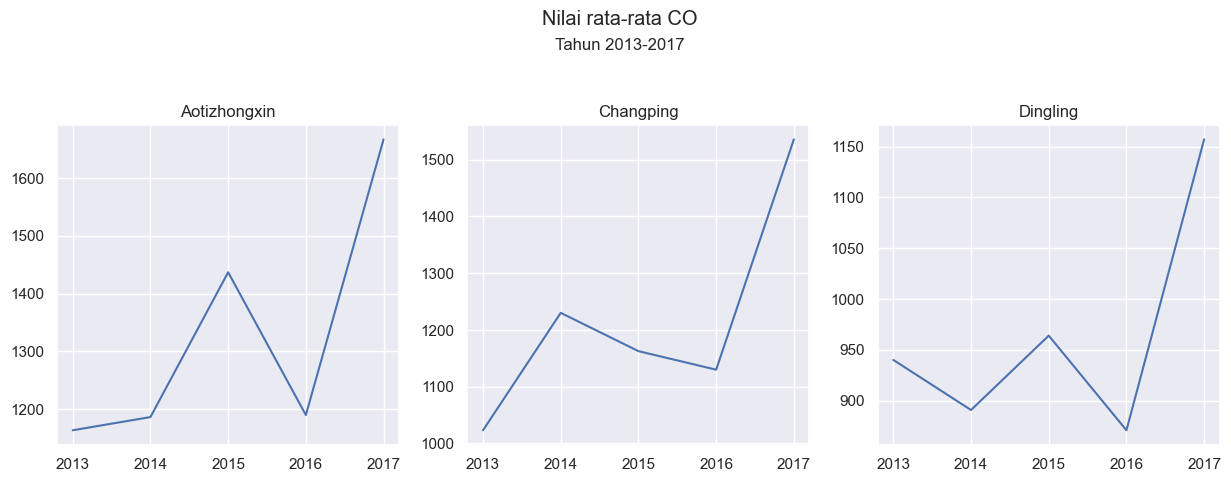

In [175]:
fig,ax = plt.subplots(1,3, figsize = (15,5), sharex=True)


fig.subplots_adjust(hspace=0.7, top=0.75)
fig.suptitle('Nilai rata-rata CO')
fig.text(0.5,0.9,'Tahun 2013-2017', horizontalalignment="center")
sns.set(style = 'darkgrid')

ax[0].title.set_text('Aotizhongxin')
ax[0].plot(year_Aotizhongxin_params['year'].values, year_Aotizhongxin_params['CO'].values)


ax[1].title.set_text('Changping')
ax[1].plot(year_Changping_params['year'].values, year_Changping_params['CO'].values)


ax[2].title.set_text('Dingling')
ax[2].plot(year_Dingling_params['year'].values, year_Dingling_params['CO'].values)

Untuk faktor CO, nilai dari ketiga stasiun terjadi penlonjakan nilai dari 2016 ke 2017 (**tertinggi**) dan untuk stasiun Aoitzongxin dan Changping 2013 merupakan nilai **terendah** sedangkan **Dingling nilai CO terendah** terletak pada tahun 2014

# Kesimpulan

Berdasarkan hasil pengorekkan informasi di atas dan analisis yang dilakukan didapatkan kesimpulan bahwasanya

1. Tidak ada korelasi yang kuat antara hubungan parameter TEMP (Temperature), DEWP (Dew Point), PRES (Pressure), Rain terhadap faktor-faktor penting kualiatas udara

2. Aotizhongxin merupakan statsiun yang memiliki tingkat rata-rata faktor kualitas udara tertinggi dari statsiun yang lain kecuali faktor O3, sedangkan Dingling merupakan stasiun yang memiliki kualitas udara yang paling baik dimana faktor-faktor kualitas udara (kecuali O3) memiliki nilai paling rendah. Pada statsiun Changping bersifat tidak buruk namun juga tidak baik dalam kualitas udaranya

3. Tahun 2014 dan 2017 merupakan tahun yang paling sering terjadi nya polusi udara dari ketiga stasiun tersebut dan Tahun 2016 merupakan tahun yang memiliki tingkat kualitas paling baik selama 5 tahun terakhir